# Indian-Foods 

I will be analysing the dataset named indian_foods which was retrieved from kaggle dataset named indian_foods.csv. This dataset consist of the names of the foods, the ingredients, the courses and the regions.

## Downloading the Dataset

 Using the method provided from jovian I will be using the opendataset python library to extract the dataset from kaggle

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:

dataset_url = 'https://www.kaggle.com/nehaprabhavalkar/indian-food-101' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: romariobarker
Your Kaggle Key: ········


100%|██████████| 6.79k/6.79k [00:00<00:00, 2.79MB/s]

The dataset has been downloaded and extracted.

In [4]:

data_dir = './indian-food-101'

In [5]:
import os
os.listdir(data_dir)

['indian_food.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "Indian-foods" 

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [64]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "rbarker3001/indian-foods" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/rbarker3001/indian-foods


'https://jovian.ml/rbarker3001/indian-foods'

## Data Preparation and Cleaning

With the numerous amount of data this dataset contains, I will be importing the python libraries needed and will read and extract the data needed to show or visualise incorrect or missing data.



In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [12]:
#loading the dataset
indian = pd.read_csv(data_dir +'/indian_food.csv')
indian

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central


In [13]:
indian.describe()#showing the various calculations of each row/column

,prep_time,cook_time
count,255.000000,255.000000
mean,31.105882,34.529412
std,72.554409,48.265650
min,-1.000000,-1.000000
25%,10.000000,20.000000
50%,10.000000,30.000000
75%,20.000000,40.000000
max,500.000000,720.000000


In [14]:
indian.columns # This gets the list of column values

Index(['name', 'ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region'],
      dtype='object')

In [15]:
indian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [31]:
indian.prep_time.unique()

array([ 45,  80,  15,  10,  20,   5,  30,  -1,  40,  25, 480, 180, 240,
       120,  60, 500, 150, 360, 495,  70,  35,  12])

In [32]:
indian.shape #Showing the rows and columns of the dataset 

(255, 9)

In [33]:
indian['ingredients'] #This just retrieve the specific data from the dataset

0                        Maida flour, yogurt, oil, sugar
1                                Gram flour, ghee, sugar
2           Carrots, milk, sugar, ghee, cashews, raisins
3      Flour, ghee, kewra, milk, clarified butter, su...
4      Milk powder, plain flour, baking powder, ghee,...
                             ...                        
250              Glutinous rice, black sesame seeds, gur
251    Coconut milk, egg yolks, clarified butter, all...
252    Cottage cheese, dry dates, dried rose petals, ...
253    Milk powder, dry fruits, arrowroot powder, all...
254    Brown rice, fennel seeds, grated coconut, blac...
Name: ingredients, Length: 255, dtype: object

In [34]:
indian.head(11) #retrive the first 11 rows of the dataset

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
5,Imarti,"Sugar syrup, lentil flour",vegetarian,10,50,sweet,dessert,West Bengal,East
6,Jalebi,"Maida, corn flour, baking soda, vinegar, curd,...",vegetarian,10,50,sweet,dessert,Uttar Pradesh,North
7,Kaju katli,"Cashews, ghee, cardamom, sugar",vegetarian,10,20,sweet,dessert,-1,-1
8,Kalakand,"Milk, cottage cheese, sugar",vegetarian,20,30,sweet,dessert,West Bengal,East
9,Kheer,"Milk, rice, sugar, dried fruits",vegetarian,10,40,sweet,dessert,-1,-1


In [35]:
import jovian

In [36]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "rbarker3001/indian-foods" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/rbarker3001/indian-foods


'https://jovian.ml/rbarker3001/indian-foods'

## Exploratory Analysis and Visualization

For this section, there will be discrete and visual analysis of the dataset to match the dataframes.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [16]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Displaying the number of ingredients used.

In [17]:
#Counting the number of ingredients for one of the ingrdients
indian.ingredients.count()
print(' They are exactly {} ingredients which were used for the various indian foods'.format(indian.ingredients.count()))

 They are exactly 255 ingredients which were used for the various indian foods


In [18]:
#This table is a representation of vegeterians to non-vegeterians
num_vegeterians = indian.groupby('diet')[['name']].count()
num_vegeterians

,name
diet,
non vegetarian,29
vegetarian,226


Visual Representation of the vegeterian population to the non-vegeterian population

In [19]:
indian['diet'].value_counts()

vegetarian        226
non vegetarian     29
Name: diet, dtype: int64

<AxesSubplot:xlabel='diet', ylabel='count'>

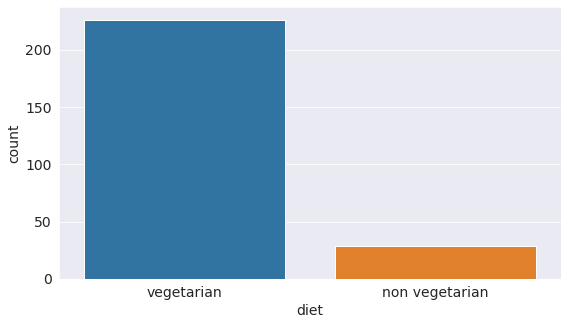

In [20]:
sns.countplot(x='diet', data=indian)

Organising the indian couses by preperation time

,prep_time,course
0,main course,129
1,dessert,85
2,snack,39
3,starter,2


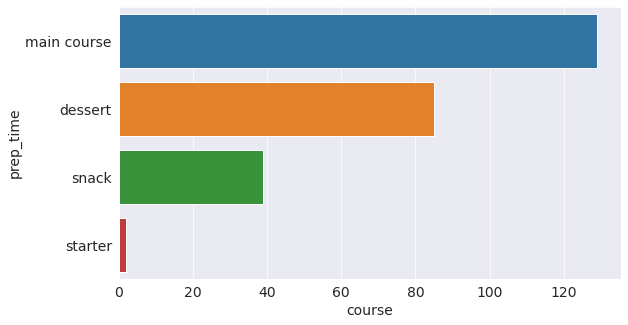

In [21]:
indian_courses = indian['course'].value_counts()
indian_courses = pd.DataFrame(indian_courses).reset_index()
indian_courses.columns = ['prep_time','course']
sns.barplot(y = 'prep_time',x = 'course', data=indian_courses)
indian_courses

In [22]:
indian_time = indian.groupby('region').count()

indian_time


,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state
region,,,,,,,,
-1,13,13,13,13,13,13,13,13
Central,3,3,3,3,3,3,3,3
East,31,31,31,31,31,31,31,31
North,49,49,49,49,49,49,49,49
North East,25,25,25,25,25,25,25,25
South,59,59,59,59,59,59,59,59
West,74,74,74,74,74,74,74,74


Explore one or more columns by plotting a graph below, and add some explanation about it

Explore one or more columns by plotting a graph below, and add some explanation about it

In [24]:
import jovian

In [25]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "rbarker3001/indian-foods" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/rbarker3001/indian-foods


'https://jovian.ml/rbarker3001/indian-foods'

## Asking and Answering Questions
For this point in the section the following questions asked and answer will be:

1) So what would be the diet based on region? 
2) Find the number of matches where team batting first is the match winner?
3) what would be the cooking time shown as a graph? 
4) What is the course meal that is used in relation to the diet?
5) I have seen the cooking time but what would be the preparation time shown as a graph?


#### Q1: So what would be the diet based on region?

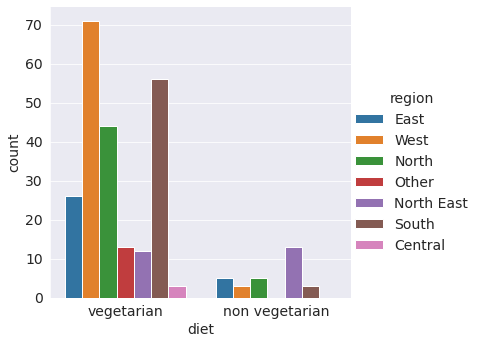

In [47]:
#We use Cat plot to plot, analyse and display the needed information via a graph
sns.catplot(x = 'diet' , kind = 'count' , data = indian, hue='region')

In [31]:
#Changing the negative 1 to Other 
indian['region'] = indian['region'].replace('-1','Other')

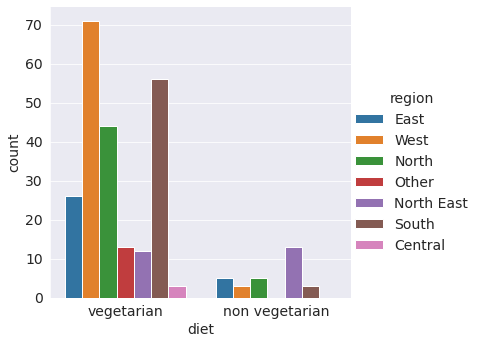

In [36]:
#Lets check the diet plot with region
sns.catplot(x = 'diet' , kind = 'count' , data = indian, hue='region')

#### Q2:  what would be the cooking time shown as a graph?

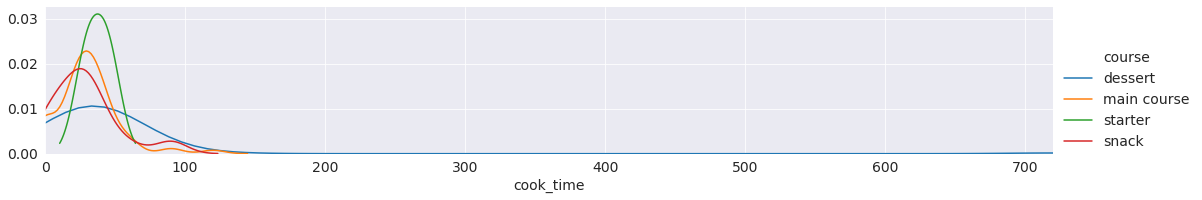

In [41]:
fig = sns.FacetGrid(indian, hue="course",aspect=5)
formers = indian['cook_time'].max()
fig.map(sns.kdeplot,'cook_time')
fig.set(xlim=(0,formers))
fig.add_legend()

#### Q3: What is the flavour present in both the vegeterian and non-vegeterian dish?

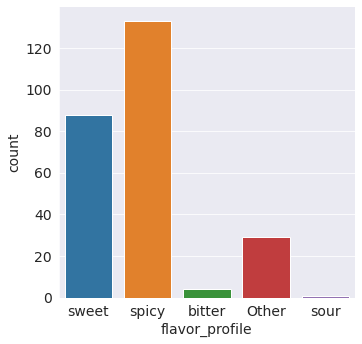

In [46]:
sns.catplot(x='flavor_profile', kind='count', data=indian)

In [45]:
#Changing the -1 to other again
indian['flavor_profile'] = indian['flavor_profile'].replace('-1','Other')

#### Q4: What is the course meal that is used in relation to the diet?

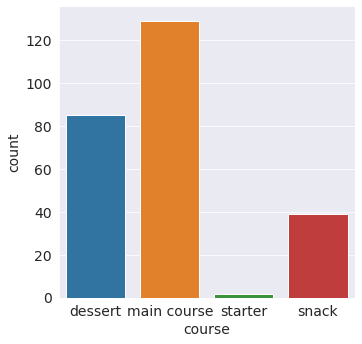

In [51]:
sns.catplot(x='course', kind='count', data=indian)

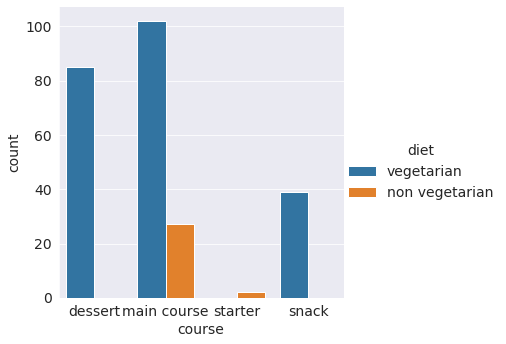

In [56]:
#Showing the information on a side for both the vegeterian and non-vegeterian
sns.catplot(x='course',hue = 'diet', kind='count', data=indian)

#### Q5: I have seen the cooking time but what would be the preparation time shown as a graph?

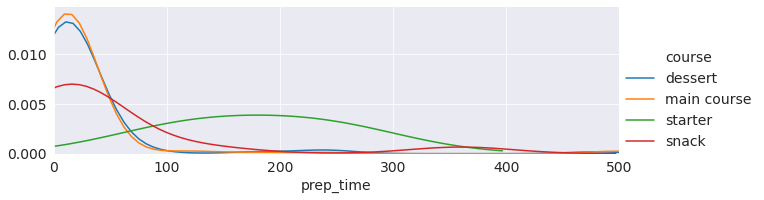

In [58]:
fig = sns.FacetGrid(indian ,aspect=3, hue="course")
formers = indian['prep_time'].max()
fig.map(sns.kdeplot,'prep_time')
fig.set(xlim=(0,formers))
fig.add_legend()

In [59]:
import jovian

In [60]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "rbarker3001/indian-foods" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/rbarker3001/indian-foods


'https://jovian.ml/rbarker3001/indian-foods'

## Inferences and Conclusion

 This dataset consists of information about various Indian dishes, their ingredients, their place of origin, and so forth. With this dataset and the various libraries, I was able to display the variety of dishes and cultures within india whether through a graph or multiple tables.

In [61]:
import jovian

In [62]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "rbarker3001/indian-foods" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/rbarker3001/indian-foods


'https://jovian.ml/rbarker3001/indian-foods'

## References and Future Work

 After completing this project which was very useful, I plan to continue working on projects using datasets which includes various cultures and lifestyles, the resources which I found the dataset was Kaggle, as well as the discussion for the course project which was helpful as well as freecodecamp and pythonprogramming.net

In [32]:
import jovian

In [63]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "rbarker3001/indian-foods" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/rbarker3001/indian-foods


'https://jovian.ml/rbarker3001/indian-foods'